Training the SVM Regressor using dlib

In [3]:
import os
import cv2
import numpy as np
import dlib
import scipy.io
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to detect facial landmarks from an image
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    if len(rects) > 0:
        # Assuming one face per image
        shape = predictor(gray, rects[0])
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])
        return landmarks.flatten()  # Flatten the landmarks into a 1D array
    else:
        return None

# Function to load data and extract features and labels
def load_data_and_extract_features(directory):
    X = []  # Feature vectors (landmarks)
    y_pitch = []  # Pitch angles
    y_yaw = []  # Yaw angles
    y_roll = []  # Roll angles
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            mat_path = os.path.join(directory, filename.replace('.jpg', '.mat'))
            
            # Check if the corresponding .mat file exists
            if os.path.exists(mat_path):
                image = cv2.imread(image_path)
                landmarks = get_landmarks(image)
                
                if landmarks is not None:
                    X.append(landmarks)
                    
                    # Load the ground truth values from the .mat file
                    mat_data = scipy.io.loadmat(mat_path)
                    pose_params = mat_data['Pose_Para'][0][:3]  # Pitch, Yaw, Roll
                    
                    y_pitch.append(pose_params[0])
                    y_yaw.append(pose_params[1])
                    y_roll.append(pose_params[2])
                    
    return np.array(X), np.array(y_pitch), np.array(y_yaw), np.array(y_roll)

# Directory containing the images and mat files
directory = 'D:/NTI/AFLW2000-3D/AFLW2000'

# Load data and extract features
X, y_pitch, y_yaw, y_roll = load_data_and_extract_features(directory)

# Split data into training and testing sets
X_train, X_test, y_pitch_train, y_pitch_test = train_test_split(X, y_pitch, test_size=0.2, random_state=42)
_, _, y_yaw_train, y_yaw_test = train_test_split(X, y_yaw, test_size=0.2, random_state=42)
_, _, y_roll_train, y_roll_test = train_test_split(X, y_roll, test_size=0.2, random_state=42)

# Initialize SVM regressors for each angle
svr_pitch = SVR(kernel='rbf')
svr_yaw = SVR(kernel='rbf')
svr_roll = SVR(kernel='rbf')

# Train the regressors
svr_pitch.fit(X_train, y_pitch_train)
svr_yaw.fit(X_train, y_yaw_train)
svr_roll.fit(X_train, y_roll_train)

# Predict on the test set
y_pitch_pred = svr_pitch.predict(X_test)
y_yaw_pred = svr_yaw.predict(X_test)
y_roll_pred = svr_roll.predict(X_test)

# Evaluate the model
mse_pitch = mean_squared_error(y_pitch_test, y_pitch_pred)
mse_yaw = mean_squared_error(y_yaw_test, y_yaw_pred)
mse_roll = mean_squared_error(y_roll_test, y_roll_pred)

print(f'Pitch MSE: {mse_pitch}')
print(f'Yaw MSE: {mse_yaw}')
print(f'Roll MSE: {mse_roll}')

Pitch MSE: 0.008480939693377758
Yaw MSE: 0.01989485019180596
Roll MSE: 0.006146834082324592


EVALUATION

Pitch MSE: 0.008480939693377758
Yaw MSE: 0.01989485019180596
Roll MSE: 0.006146834082324592


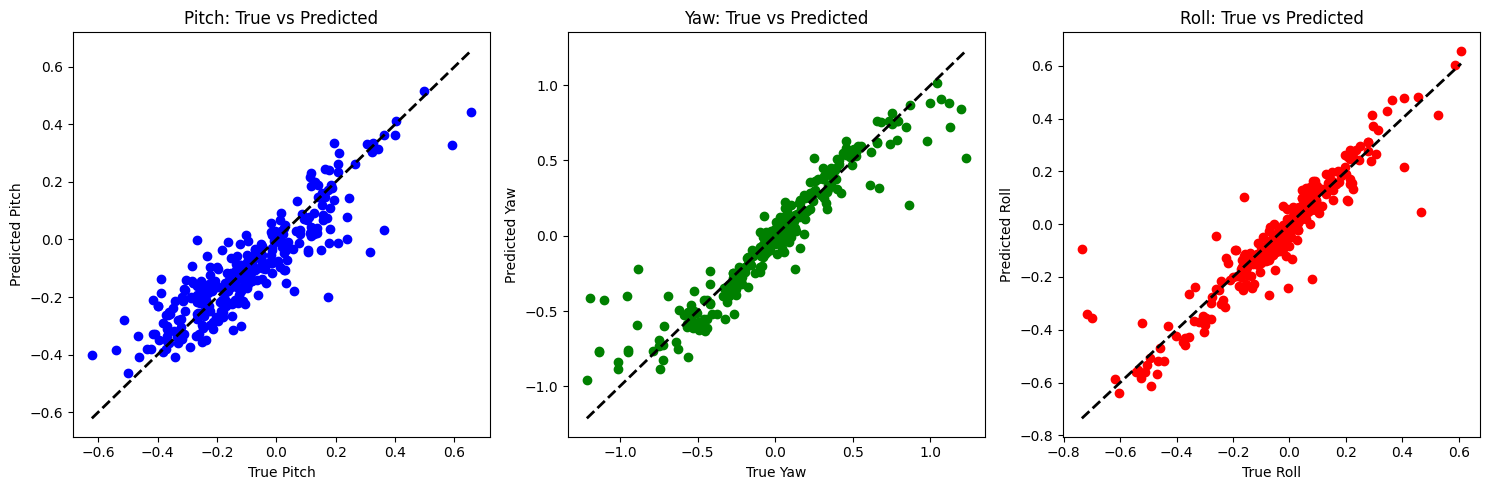

Train Pitch MSE: 0.0138824800677409
Train Yaw MSE: 0.021202556975902103
Train Roll MSE: 0.007901482338366229


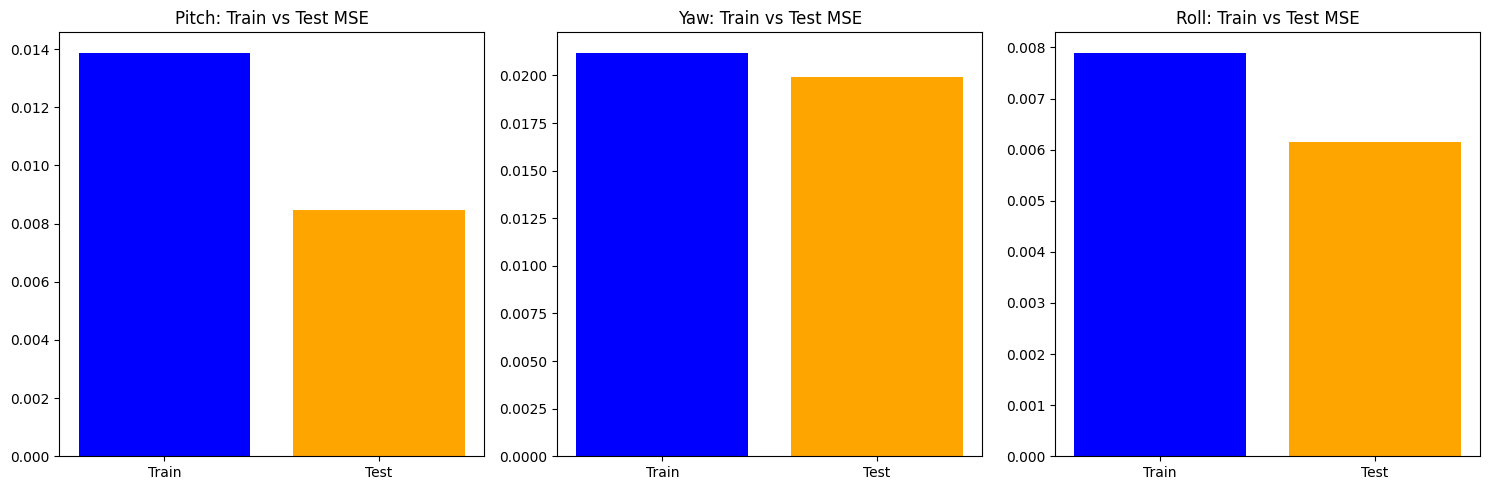

In [4]:
import os
import cv2
import numpy as np
import dlib
import scipy.io
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to detect facial landmarks from an image
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    if len(rects) > 0:
        # Assuming one face per image
        shape = predictor(gray, rects[0])
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])
        return landmarks.flatten()  # Flatten the landmarks into a 1D array
    else:
        return None

# Function to load data and extract features and labels
def load_data_and_extract_features(directory):
    X = []  # Feature vectors (landmarks)
    y_pitch = []  # Pitch angles
    y_yaw = []  # Yaw angles
    y_roll = []  # Roll angles
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            image_path = os.path.join(directory, filename)
            mat_path = os.path.join(directory, filename.replace('.jpg', '.mat'))
            
            # Check if the corresponding .mat file exists
            if os.path.exists(mat_path):
                image = cv2.imread(image_path)
                landmarks = get_landmarks(image)
                
                if landmarks is not None:
                    X.append(landmarks)
                    
                    # Load the ground truth values from the .mat file
                    mat_data = scipy.io.loadmat(mat_path)
                    pose_params = mat_data['Pose_Para'][0][:3]  # Pitch, Yaw, Roll
                    
                    y_pitch.append(pose_params[0])
                    y_yaw.append(pose_params[1])
                    y_roll.append(pose_params[2])
                    
    return np.array(X), np.array(y_pitch), np.array(y_yaw), np.array(y_roll)

# Directory containing the images and mat files
directory = 'D:/NTI/AFLW2000-3D/AFLW2000'

# Load data and extract features
X, y_pitch, y_yaw, y_roll = load_data_and_extract_features(directory)

# Split data into training and testing sets
X_train, X_test, y_pitch_train, y_pitch_test = train_test_split(X, y_pitch, test_size=0.2, random_state=42)
_, _, y_yaw_train, y_yaw_test = train_test_split(X, y_yaw, test_size=0.2, random_state=42)
_, _, y_roll_train, y_roll_test = train_test_split(X, y_roll, test_size=0.2, random_state=42)

# Initialize SVM regressors for each angle
svr_pitch = SVR(kernel='rbf')
svr_yaw = SVR(kernel='rbf')
svr_roll = SVR(kernel='rbf')

# Train the regressors
svr_pitch.fit(X_train, y_pitch_train)
svr_yaw.fit(X_train, y_yaw_train)
svr_roll.fit(X_train, y_roll_train)

# Predict on the test set
y_pitch_pred = svr_pitch.predict(X_test)
y_yaw_pred = svr_yaw.predict(X_test)
y_roll_pred = svr_roll.predict(X_test)

# Evaluate the model
mse_pitch = mean_squared_error(y_pitch_test, y_pitch_pred)
mse_yaw = mean_squared_error(y_yaw_test, y_yaw_pred)
mse_roll = mean_squared_error(y_roll_test, y_roll_pred)

print(f'Pitch MSE: {mse_pitch}')
print(f'Yaw MSE: {mse_yaw}')
print(f'Roll MSE: {mse_roll}')

# Plot predicted vs actual values for each angle
plt.figure(figsize=(15, 5))

# Pitch
plt.subplot(1, 3, 1)
plt.scatter(y_pitch_test, y_pitch_pred, c='blue')
plt.plot([min(y_pitch_test), max(y_pitch_test)], [min(y_pitch_test), max(y_pitch_test)], 'k--', lw=2)
plt.xlabel('True Pitch')
plt.ylabel('Predicted Pitch')
plt.title('Pitch: True vs Predicted')

# Yaw
plt.subplot(1, 3, 2)
plt.scatter(y_yaw_test, y_yaw_pred, c='green')
plt.plot([min(y_yaw_test), max(y_yaw_test)], [min(y_yaw_test), max(y_yaw_test)], 'k--', lw=2)
plt.xlabel('True Yaw')
plt.ylabel('Predicted Yaw')
plt.title('Yaw: True vs Predicted')

# Roll
plt.subplot(1, 3, 3)
plt.scatter(y_roll_test, y_roll_pred, c='red')
plt.plot([min(y_roll_test), max(y_roll_test)], [min(y_roll_test), max(y_roll_test)], 'k--', lw=2)
plt.xlabel('True Roll')
plt.ylabel('Predicted Roll')
plt.title('Roll: True vs Predicted')

plt.tight_layout()
plt.show()

# Visualizing overfitting with train vs test loss
y_pitch_train_pred = svr_pitch.predict(X_train)
y_yaw_train_pred = svr_yaw.predict(X_train)
y_roll_train_pred = svr_roll.predict(X_train)

mse_pitch_train = mean_squared_error(y_pitch_train, y_pitch_train_pred)
mse_yaw_train = mean_squared_error(y_yaw_train, y_yaw_train_pred)
mse_roll_train = mean_squared_error(y_roll_train, y_roll_train_pred)

print(f'Train Pitch MSE: {mse_pitch_train}')
print(f'Train Yaw MSE: {mse_yaw_train}')
print(f'Train Roll MSE: {mse_roll_train}')

# Plot train vs test loss for each angle
plt.figure(figsize=(15, 5))

# Pitch
plt.subplot(1, 3, 1)
plt.bar(['Train', 'Test'], [mse_pitch_train, mse_pitch], color=['blue', 'orange'])
plt.title('Pitch: Train vs Test MSE')

# Yaw
plt.subplot(1, 3, 2)
plt.bar(['Train', 'Test'], [mse_yaw_train, mse_yaw], color=['blue', 'orange'])
plt.title('Yaw: Train vs Test MSE')

# Roll
plt.subplot(1, 3, 3)
plt.bar(['Train', 'Test'], [mse_roll_train, mse_roll], color=['blue', 'orange'])
plt.title('Roll: Train vs Test MSE')

plt.tight_layout()
plt.show()

In [5]:
import joblib
joblib.dump(svr_pitch, 'svr_pitch_model.pkl')
joblib.dump(svr_yaw, 'svr_yaw_model.pkl')
joblib.dump(svr_roll, 'svr_roll_model.pkl')

['svr_roll_model.pkl']

predict the angles and classify the pose using dlib

In [3]:
import os
import cv2
import numpy as np
import dlib
import joblib
import mediapipe as mp
import time
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Function to detect facial landmarks from an image
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    if len(rects) > 0:
        # Assuming one face per image
        shape = predictor(gray, rects[0])
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])
        return landmarks.flatten()  # Flatten the landmarks into a 1D array
    else:
        return None

# Load your pre-trained SVM models
svr_pitch = joblib.load('svr_pitch_model.pkl')
svr_yaw = joblib.load('svr_yaw_model.pkl')
svr_roll = joblib.load('svr_roll_model.pkl')

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(max_num_faces=1, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Set up tkinter root (hidden)
Tk().withdraw()

# Open file dialog to select an image
image_path = askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
if not image_path:
    print("No file selected.")
    exit()

# Read and process the selected image
image = cv2.imread(image_path)
if image is None:
    print("Error reading image.")
    exit()

# Get landmarks using dlib and predict angles using SVM models
landmarks = get_landmarks(image)
if landmarks is not None:
    pitch_pred = svr_pitch.predict([landmarks])[0]
    yaw_pred = svr_yaw.predict([landmarks])[0]
    roll_pred = svr_roll.predict([landmarks])[0]
    print(f'Predicted by SVM - Pitch: {pitch_pred:.2f}, Yaw: {yaw_pred:.2f}, Roll: {roll_pred:.2f}')
else:
    print("No face detected using dlib.")
    exit()

# Use MediaPipe to get face landmarks and calculate pose direction
start = time.time()

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb.flags.writeable = False
results = face_mesh.process(image_rgb)
image_rgb.flags.writeable = True
image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

img_h, img_w, img_c = image.shape

if results.multi_face_landmarks:
    for face_idx, face_landmarks in enumerate(results.multi_face_landmarks):
        face_3d = []
        face_2d = []
        
        for idx, lm in enumerate(face_landmarks.landmark):
            if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
                if idx == 1:
                    nose_2d = (lm.x * img_w, lm.y * img_h)
                    nose_3d = (lm.x * img_w, lm.y * img_h, lm.z * 3000)
                    
                x, y = int(lm.x * img_w), int(lm.y * img_h)
                
                # 2D coordinates
                face_2d.append([x, y])
                
                # 3D coordinates
                face_3d.append([x, y, lm.z])
                
        # Convert lists to numpy arrays
        face_2d = np.array(face_2d, dtype=np.float64)
        face_3d = np.array(face_3d, dtype=np.float64)
        
        # Camera matrix
        focal_length = 1 * img_w
        cam_mtx = np.array([[focal_length, 0, img_h / 2],
                            [0, focal_length, img_w / 2],
                            [0, 0, 1]])
        
        # Distortion parameters
        dist_mtx = np.zeros((4, 1), dtype=np.float64)
        
        # Solve PnP
        success, rot_vec, translation_vector = cv2.solvePnP(face_3d, face_2d, cam_mtx, dist_mtx)
        
        # Rotation matrix
        rmat, _ = cv2.Rodrigues(rot_vec)
        
        # Angles calculated from MediaPipe landmarks
        angles, mtxR, mtxQ, Qx, Qy, Qz = cv2.RQDecomp3x3(rmat)
        
        # Rotation degree
        x = angles[0] * 360
        y = angles[1] * 360
        z = angles[2] * 360
        
        # Tilting position
        if y < -10:
            text = f"Face {face_idx + 1}: Looking Left"
        elif y > 10:
            text = f"Face {face_idx + 1}: Looking Right"
        elif x < -10:
            text = f"Face {face_idx + 1}: Looking Down"
        elif x > 10:
            text = f"Face {face_idx + 1}: Looking Up"
        else:
            text = f"Face {face_idx + 1}: Forward"
            
        # Nose direction
        nose_3d_projection, _ = cv2.projectPoints(nose_3d, rot_vec, translation_vector, cam_mtx, dist_mtx)
        
        p1 = (int(nose_2d[0]), int(nose_2d[1]))
        
        # Fixed length for the blue line
        length = 150
        p2 = (int(nose_2d[0] + length * np.sin(y * np.pi / 180)), int(nose_2d[1] - length * np.sin(x * np.pi / 180))) 
        
        # Draw axis lines
        cv2.line(image, p1, p2, (255, 0, 0), 3)  # Blue line
        cv2.line(image, p1, (p1[0], p1[1] + 100), (0, 255, 0), 3)  # Green line
        cv2.line(image, p1, (p1[0] + 100, p1[1]), (0, 0, 255), 3)  # Red line
        
        # Text on image with smaller font size
        font_scale = 0.4
        thickness = 1
        
        cv2.putText(image, text, (50, 50 + face_idx * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
        cv2.putText(image, f"X: {x:.2f} Y: {y:.2f} Z: {z:.2f}", (50, 80 + face_idx * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
        cv2.putText(image, f"SVM Pitch: {pitch_pred:.2f}, Yaw: {yaw_pred:.2f}, Roll: {roll_pred:.2f}", (50, 110 + face_idx * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
    
    end = time.time()
    totalTime = end - start
    
    fps = 1 / totalTime
    print("FPS: ", fps)
    
    cv2.putText(image, f"FPS: {int(fps)}", (50, 140 + len(results.multi_face_landmarks) * 110), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
    
    # Draw landmarks for each face
    #for face_landmarks in results.multi_face_landmarks:
        #mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS, drawing_spec, drawing_spec)

    cv2.imshow("Head Pose Estimation", image)
    cv2.waitKey(0)  # Wait for a key press to close the image window

cv2.destroyAllWindows()

Predicted by SVM - Pitch: -0.01, Yaw: -0.05, Roll: 0.01
FPS:  95.11756168359942


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [1]:
import os
import cv2
import numpy as np
import dlib
import joblib
import mediapipe as mp
import time
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Load your pre-trained SVM models
svr_pitch = joblib.load('svr_pitch_model.pkl')
svr_yaw = joblib.load('svr_yaw_model.pkl')
svr_roll = joblib.load('svr_roll_model.pkl')

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(max_num_faces=3, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Function to detect facial landmarks using dlib
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    
    if len(rects) > 0:
        # Assuming one face per detection
        landmarks_all_faces = []
        for rect in rects:
            shape = predictor(gray, rect)
            landmarks = np.array([[p.x, p.y] for p in shape.parts()])
            landmarks_all_faces.append(landmarks.flatten())  # Flatten the landmarks into a 1D array
        return landmarks_all_faces
    else:
        return []

# Function to process image/frame and apply face pose estimation
def process_frame(image):
    start = time.time()  # Start timing here

    # Get landmarks using dlib and predict angles using SVM models
    landmarks_list = get_landmarks(image)
    
    if landmarks_list:
        for i, landmarks in enumerate(landmarks_list):
            pitch_pred = svr_pitch.predict([landmarks])[0]
            yaw_pred = svr_yaw.predict([landmarks])[0]
            roll_pred = svr_roll.predict([landmarks])[0]
            print(f'Face {i + 1}: Predicted by SVM - Pitch: {pitch_pred:.2f}, Yaw: {yaw_pred:.2f}, Roll: {roll_pred:.2f}')
            
            # Use MediaPipe to get face landmarks and calculate pose direction
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = face_mesh.process(rgb_image)

            if results.multi_face_landmarks:
                face_3d = []
                face_2d = []

                for face_landmarks in results.multi_face_landmarks:
                    for idx, lm in enumerate(face_landmarks.landmark):
                        if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
                            if idx == 1:
                                nose_2d = (lm.x * img_w, lm.y * img_h)
                                nose_3d = (lm.x * img_w, lm.y * img_h, lm.z * 3000)
                                
                            x, y = int(lm.x * img_w), int(lm.y * img_h)
                            
                            # 2D coordinates
                            face_2d.append([x, y])
                            
                            # 3D coordinates
                            face_3d.append([x, y, lm.z])

                    # Convert lists to numpy arrays
                    face_2d = np.array(face_2d, dtype=np.float64)
                    face_3d = np.array(face_3d, dtype=np.float64)

                    # Camera matrix
                    focal_length = 1 * img_w
                    cam_mtx = np.array([[focal_length, 0, img_h / 2],
                                        [0, focal_length, img_w / 2],
                                        [0, 0, 1]])

                    # Distortion parameters
                    dist_mtx = np.zeros((4, 1), dtype=np.float64)

                    # Solve PnP
                    success, rot_vec, translation_vector = cv2.solvePnP(face_3d, face_2d, cam_mtx, dist_mtx)

                    # Rotation matrix
                    rmat, _ = cv2.Rodrigues(rot_vec)

                    # Angles calculated from MediaPipe landmarks
                    angles, mtxR, mtxQ, Qx, Qy, Qz = cv2.RQDecomp3x3(rmat)

                    # Rotation degree
                    x = angles[0] * 360
                    y = angles[1] * 360
                    z = angles[2] * 360

                    # Tilting position
                    if y < -10:
                        text = f"Face {i + 1}: Looking Left"
                    elif y > 10:
                        text = f"Face {i + 1}: Looking Right"
                    elif x < -10:
                        text = f"Face {i + 1}: Looking Down"
                    elif x > 10:
                        text = f"Face {i + 1}: Looking Up"
                    else:
                        text = f"Face {i + 1}: Forward"

                    # Nose direction
                    nose_3d_projection, _ = cv2.projectPoints(nose_3d, rot_vec, translation_vector, cam_mtx, dist_mtx)

                    p1 = (int(nose_2d[0]), int(nose_2d[1]))

                    # Fixed length for the blue line
                    length = 150
                    p2 = (int(nose_2d[0] + length * np.sin(y * np.pi / 180)), int(nose_2d[1] - length * np.sin(x * np.pi / 180))) 

                    # Draw axis lines
                    cv2.line(image, p1, p2, (255, 0, 0), 3)  # Blue line
                    cv2.line(image, p1, (p1[0], p1[1] + 100), (0, 255, 0), 3)  # Green line
                    cv2.line(image, p1, (p1[0] + 100, p1[1]), (0, 0, 255), 3)  # Red line

                    # Text on image with smaller font size and non-overlapping
                    font_scale = 0.4
                    thickness = 1
                    y_offset = i * 50  # Offset for each face's text

                    cv2.putText(image, text, (50, 50 + y_offset), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)
                    cv2.putText(image, f"SVM Pitch: {pitch_pred:.2f}, Yaw: {yaw_pred:.2f}, Roll: {roll_pred:.2f}", (50, 80 + y_offset), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)

        end = time.time()
        totalTime = end - start

        fps = 1 / totalTime
        print("FPS: ", fps)

        cv2.putText(image, f"FPS: {int(fps)}", (50, 110 + y_offset), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)

    return image

# Set up tkinter root (hidden)
Tk().withdraw()

# Open file dialog to select a video or start the webcam
input_type = input("Select input type: 1 for Webcam, 2 for Video file: ")

if input_type == "1":
    cap = cv2.VideoCapture(0)  # Open webcam
elif input_type == "2":
    video_path = askopenfilename(title="Select a Video File", filetypes=[("Video Files", "*.mp4;*.avi;*.mov")])
    if not video_path:
        print("No file selected.")
        exit()
    cap = cv2.VideoCapture(video_path)  # Open video file
else:
    print("Invalid input.")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    img_h, img_w, img_c = frame.shape  # Update frame dimensions for each frame

    processed_frame = process_frame(frame)
    cv2.imshow("Head Pose Estimation", processed_frame)

    if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' to exit
        break

cap.release()
cv2.destroyAllWindows()


Face 1: Predicted by SVM - Pitch: -0.36, Yaw: -0.51, Roll: 0.29
FPS:  5.74582656368583
Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.36, Roll: 0.09
FPS:  6.130759594878834


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.24, Roll: -0.04
FPS:  5.821395756823753
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.22, Roll: -0.06
FPS:  6.269006687053661


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.20, Roll: -0.07
FPS:  6.755331074203399
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.20, Roll: -0.08
FPS:  6.182914928431387


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.20, Roll: -0.08
FPS:  6.4028137365053
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.18, Roll: -0.09
FPS:  6.868274278752469


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.17, Roll: -0.10
FPS:  6.461204771763778
Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.12, Roll: -0.12
FPS:  6.191083065795786


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.32, Yaw: 0.05, Roll: -0.14
FPS:  6.6415170823779786


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.33, Yaw: 0.03, Roll: -0.15
FPS:  6.705457661477268
Face 1: Predicted by SVM - Pitch: -0.38, Yaw: -0.02, Roll: -0.14
FPS:  6.731446931507596


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.08, Roll: -0.13
FPS:  6.771461183160077
Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.12, Roll: -0.13
FPS:  5.664067110414295


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.12, Roll: -0.14
FPS:  6.619233840550206
Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.10, Roll: -0.15
FPS:  6.727926893235186


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.07, Roll: -0.17
FPS:  6.599019816077848
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.06, Roll: -0.17
FPS:  6.455526432033343


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.06, Roll: -0.17
FPS:  6.040193030231898
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.09, Roll: -0.14
FPS:  6.4770793793943735


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.20, Roll: -0.03
FPS:  5.864256632812849
Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.17, Roll: -0.07
FPS:  6.558744515229133


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.55, Yaw: -0.10, Roll: -0.17
FPS:  6.665761858522546
Face 1: Predicted by SVM - Pitch: -0.57, Yaw: -0.10, Roll: -0.20
FPS:  6.027987726446346


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.58, Yaw: -0.18, Roll: -0.14
FPS:  6.347888730816963
Face 1: Predicted by SVM - Pitch: -0.57, Yaw: -0.23, Roll: -0.09
FPS:  6.886972513217957


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.26, Roll: -0.07
FPS:  6.250182917106884
Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.26, Roll: -0.09
FPS:  5.578555639199747


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.54, Yaw: -0.26, Roll: -0.09
FPS:  6.683361643407789
Face 1: Predicted by SVM - Pitch: -0.55, Yaw: -0.25, Roll: -0.09
FPS:  6.840885107882105


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.22, Roll: -0.11
FPS:  6.667255877537396
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.27, Roll: -0.07
FPS:  6.598469593233991


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.41, Yaw: -0.28, Roll: -0.07
FPS:  6.643494788861786
Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.28, Roll: -0.07
FPS:  6.814920246515203


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.39, Yaw: -0.27, Roll: -0.08
FPS:  6.756832863471607
Face 1: Predicted by SVM - Pitch: -0.41, Yaw: -0.28, Roll: -0.09
FPS:  6.741736586620375


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.29, Roll: -0.09
FPS:  6.655290763081522
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.28, Roll: -0.09
FPS:  6.551624275804328


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.25, Roll: -0.12
FPS:  6.728660830449716
Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.24, Roll: -0.14
FPS:  6.825255847180026


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.24, Roll: -0.13
FPS:  6.798086819247856
Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.23, Roll: -0.13
FPS:  6.891283667329895


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.24, Roll: -0.13
FPS:  6.041820078016514
Face 1: Predicted by SVM - Pitch: -0.61, Yaw: -0.11, Roll: -0.19
FPS:  6.915781645981833


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.61, Yaw: -0.01, Roll: -0.23
FPS:  6.772204649780977
Face 1: Predicted by SVM - Pitch: -0.62, Yaw: 0.03, Roll: -0.24
FPS:  6.7254887812418325


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.61, Yaw: 0.06, Roll: -0.26
FPS:  6.798516559039395
Face 1: Predicted by SVM - Pitch: -0.60, Yaw: 0.09, Roll: -0.27
FPS:  6.4123185868849


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.60, Yaw: 0.08, Roll: -0.27
FPS:  6.430722951601354
Face 1: Predicted by SVM - Pitch: -0.60, Yaw: 0.10, Roll: -0.27
FPS:  6.683233851615555


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.60, Yaw: 0.09, Roll: -0.27
FPS:  6.621104226686136
Face 1: Predicted by SVM - Pitch: -0.61, Yaw: 0.06, Roll: -0.26
FPS:  6.913034592335229


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.61, Yaw: 0.03, Roll: -0.25
FPS:  6.882531222668371
Face 1: Predicted by SVM - Pitch: -0.59, Yaw: -0.07, Roll: -0.22
FPS:  6.96573188027914


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.59, Yaw: -0.15, Roll: -0.18
FPS:  6.684533295934109
Face 1: Predicted by SVM - Pitch: -0.54, Yaw: -0.25, Roll: -0.13
FPS:  6.8651040984679845


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.27, Roll: -0.12
FPS:  6.244423005919415
Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.31, Roll: -0.10
FPS:  6.828267041754578


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.31, Roll: -0.09
FPS:  6.816404339170357
Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.16, Roll: -0.10
FPS:  6.919752200417399


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: 0.06, Roll: -0.10
FPS:  6.873023780184054
Face 1: Predicted by SVM - Pitch: -0.36, Yaw: 0.32, Roll: -0.11
FPS:  6.787536694382321


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.33, Yaw: 0.57, Roll: -0.13
FPS:  6.780864926036699
Face 1: Predicted by SVM - Pitch: -0.33, Yaw: 0.64, Roll: -0.14
FPS:  6.844446185077121


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.31, Yaw: 0.67, Roll: -0.14
FPS:  6.532298582590832
Face 1: Predicted by SVM - Pitch: -0.31, Yaw: 0.69, Roll: -0.13
FPS:  6.778552623710932


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.34, Yaw: 0.63, Roll: -0.13
FPS:  6.801393909026193
Face 1: Predicted by SVM - Pitch: -0.33, Yaw: 0.52, Roll: -0.12
FPS:  6.864755782000062


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.36, Yaw: 0.24, Roll: -0.10
FPS:  6.872730966995586
Face 1: Predicted by SVM - Pitch: -0.41, Yaw: 0.10, Roll: -0.10


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

FPS:  5.5857248064648015
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.15, Roll: -0.10
FPS:  6.849531884595223
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.20, Roll: -0.08
FPS:  6.0020491920573775
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.22, Roll: -0.09
FPS:  6.641664317814016


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.24, Roll: -0.08
FPS:  6.6604058519667735
Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.29, Roll: -0.07
FPS:  6.774665813837794


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.40, Roll: -0.06
FPS:  6.785110076144965
Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.53, Roll: -0.01
FPS:  6.685470913774196


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.55, Roll: 0.04
FPS:  6.4975283607245595
Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.58, Roll: 0.11
FPS:  6.492218106620066


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.58, Roll: 0.13
FPS:  6.559267617175466
Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.60, Roll: 0.11
FPS:  6.89504477180108


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.56, Roll: 0.07
FPS:  6.773637376657354
Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.54, Roll: 0.03
FPS:  6.915257143516633


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.52, Roll: 0.01
FPS:  6.706562008816715
Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.44, Roll: -0.01
FPS:  6.665126308814205


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.39, Roll: -0.02
FPS:  6.7963023276539545
Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.38, Roll: -0.02
FPS:  6.870423121213064


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.37, Roll: -0.02
FPS:  6.211703933201624
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.36, Roll: -0.00
FPS:  6.870209301792284


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.30, Yaw: -0.40, Roll: 0.04
FPS:  6.676404108062678
Face 1: Predicted by SVM - Pitch: -0.21, Yaw: -0.42, Roll: 0.05
FPS:  6.848078056553776


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.15, Yaw: -0.41, Roll: 0.07
FPS:  6.553518081023987
Face 1: Predicted by SVM - Pitch: -0.07, Yaw: -0.40, Roll: 0.07
FPS:  6.153308080289422


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.06, Yaw: -0.40, Roll: 0.07
FPS:  5.4181573916188706
Face 1: Predicted by SVM - Pitch: -0.11, Yaw: -0.42, Roll: 0.07
FPS:  5.478904350802116


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.23, Yaw: -0.42, Roll: 0.04
FPS:  6.29067910113101
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.35, Roll: -0.01
FPS:  6.6646814961236736


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.34, Roll: -0.02
FPS:  6.6437052524868525
Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.38, Roll: -0.01
FPS:  6.856485235267963


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.36, Roll: -0.01
FPS:  6.751775150310279
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.36, Roll: -0.03
FPS:  6.705296864533724


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.59, Yaw: -0.32, Roll: -0.06
FPS:  6.715786237638981
Face 1: Predicted by SVM - Pitch: -0.61, Yaw: -0.26, Roll: -0.08
FPS:  6.327767896071607


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.65, Yaw: -0.13, Roll: -0.16
FPS:  6.451753029904492
Face 1: Predicted by SVM - Pitch: -0.65, Yaw: -0.12, Roll: -0.17
FPS:  6.751536048239239


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.65, Yaw: -0.15, Roll: -0.15
FPS:  6.591563284793357
Face 1: Predicted by SVM - Pitch: -0.65, Yaw: -0.17, Roll: -0.13
FPS:  6.641485532776697


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.64, Yaw: -0.15, Roll: -0.17
FPS:  6.731619788949966
Face 1: Predicted by SVM - Pitch: -0.64, Yaw: -0.14, Roll: -0.18
FPS:  6.6437052524868525


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.66, Yaw: -0.09, Roll: -0.20
FPS:  6.494138048493482
Face 1: Predicted by SVM - Pitch: -0.61, Yaw: -0.01, Roll: -0.26
FPS:  6.915405364409183


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.65, Yaw: 0.03, Roll: -0.26
FPS:  6.819740367855563
Face 1: Predicted by SVM - Pitch: -0.68, Yaw: 0.06, Roll: -0.27
FPS:  6.865755882285538


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.64, Yaw: 0.05, Roll: -0.26
FPS:  6.775563216236911
Face 1: Predicted by SVM - Pitch: -0.60, Yaw: 0.02, Roll: -0.23
FPS:  6.828422673799578


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.55, Yaw: -0.13, Roll: -0.17
FPS:  6.750275608229138
Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.24, Roll: -0.11
FPS:  6.848458228902187


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.33, Roll: -0.04
FPS:  6.1508446166412725
Face 1: Predicted by SVM - Pitch: -0.39, Yaw: -0.40, Roll: -0.02
FPS:  6.885028037137717


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.36, Yaw: -0.45, Roll: 0.00
FPS:  6.895486857766643
Face 1: Predicted by SVM - Pitch: -0.37, Yaw: -0.51, Roll: 0.02
FPS:  6.611846232908024


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.38, Yaw: -0.52, Roll: 0.00
FPS:  6.753362347822867
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.50, Roll: -0.00
FPS:  6.797425787181768


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.48, Roll: -0.03
FPS:  6.837639832152511
Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.49, Roll: -0.03
FPS:  6.844323327594788


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.50, Roll: -0.03
FPS:  6.620686171598146
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.39, Roll: -0.06
FPS:  6.889676254679433


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.36, Roll: -0.06
FPS:  6.7773258810773775
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.38, Roll: -0.06
FPS:  6.8066588121504825


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.41, Roll: -0.07
FPS:  6.634751301860886
Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.44, Roll: -0.06
FPS:  6.869657934174644


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.46, Roll: -0.05
FPS:  6.708653760028662
Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.49, Roll: -0.04
FPS:  6.753427591081742


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.48, Roll: -0.04
FPS:  6.003776064218857
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.44, Roll: -0.03
FPS:  6.876967926205022


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.46, Roll: -0.04
FPS:  6.7067657631151425
Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.45, Roll: -0.03
FPS:  6.702286026570705


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.44, Roll: -0.03
FPS:  6.42866295341473
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.39, Roll: -0.03
FPS:  6.778585488995698


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.37, Roll: -0.01
FPS:  6.709995312622484
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.34, Roll: -0.01
FPS:  6.82465614784707


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.40, Roll: -0.04
FPS:  6.618742908721937
Face 1: Predicted by SVM - Pitch: -0.54, Yaw: -0.42, Roll: -0.03
FPS:  6.89362821153391


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.38, Roll: -0.01
FPS:  6.7118743879099005
Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.36, Roll: -0.02
FPS:  6.846356627866928


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.33, Roll: -0.01
FPS:  6.895067441497275
Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.38, Roll: -0.02
FPS:  6.920071868498466


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.55, Yaw: -0.42, Roll: -0.10
FPS:  6.164812261707738
Face 1: Predicted by SVM - Pitch: -0.54, Yaw: -0.30, Roll: -0.04
FPS:  6.81752337360051


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.31, Roll: -0.04
FPS:  6.72803481513682
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.33, Roll: -0.04
FPS:  6.872798537055365


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.32, Roll: -0.05
FPS:  6.555956046704284
Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.33, Roll: -0.04
FPS:  6.247222540799867


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.53, Yaw: -0.38, Roll: -0.03
FPS:  6.244971554236044


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.41, Yaw: -0.61, Roll: -0.16
FPS:  6.173096141137893
Face 1: Predicted by SVM - Pitch: -0.28, Yaw: -0.39, Roll: -0.34
FPS:  6.847709106107309


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.28, Yaw: -0.40, Roll: -0.35
FPS:  6.68468244481632
Face 1: Predicted by SVM - Pitch: -0.30, Yaw: -0.44, Roll: -0.31
FPS:  6.631593759733617


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.33, Yaw: -0.46, Roll: -0.31
FPS:  6.404847418700677
Face 1: Predicted by SVM - Pitch: -0.34, Yaw: -0.47, Roll: -0.30
FPS:  6.686749907533766


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.31, Yaw: -0.44, Roll: -0.30
FPS:  6.51379460826108
Face 1: Predicted by SVM - Pitch: -0.33, Yaw: -0.45, Roll: -0.26
FPS:  6.918599357345984


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.33, Yaw: -0.45, Roll: -0.23
FPS:  6.77700831472511


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.37, Roll: -0.02
FPS:  6.689842830392717


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.35, Roll: -0.08
FPS:  6.231990348098445
Face 1: Predicted by SVM - Pitch: -0.40, Yaw: -0.31, Roll: -0.13
FPS:  6.867408371605635


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.40, Yaw: -0.32, Roll: -0.12
FPS:  6.2848443437503745
Face 1: Predicted by SVM - Pitch: -0.40, Yaw: -0.29, Roll: -0.12
FPS:  6.752177314714944


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.38, Yaw: -0.29, Roll: -0.14
FPS:  6.731209267018984
Face 1: Predicted by SVM - Pitch: -0.39, Yaw: -0.27, Roll: -0.18
FPS:  6.8447030831569515


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.24, Roll: -0.21
FPS:  6.824378544954003
Face 1: Predicted by SVM - Pitch: -0.40, Yaw: -0.22, Roll: -0.22
FPS:  6.75276434335173


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.41, Yaw: -0.22, Roll: -0.21
FPS:  6.794012501761553
Face 1: Predicted by SVM - Pitch: -0.40, Yaw: -0.24, Roll: -0.20
FPS:  6.916408872941223


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.25, Roll: -0.20
FPS:  6.661315554172073
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.24, Roll: -0.19
FPS:  6.699202989985466


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.22, Roll: -0.20
FPS:  6.556509451068912
Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.22, Roll: -0.21
FPS:  6.777041165036621


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.19, Roll: -0.23
FPS:  6.846345452586699
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.18, Roll: -0.24
FPS:  6.844948829800949


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.17, Roll: -0.25
FPS:  6.110582750582751
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.17, Roll: -0.25
FPS:  6.785658932913561


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.15, Roll: -0.25
FPS:  6.6637497001212225
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.16, Roll: -0.26
FPS:  6.655670953767545


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.16, Roll: -0.25
FPS:  6.599300153563426
Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.15, Roll: -0.26
FPS:  6.688413331207144


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.15, Roll: -0.27
FPS:  6.664384987312528
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.15, Roll: -0.27
FPS:  6.917230142028775


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.15, Roll: -0.27
FPS:  6.695641762834379
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.15, Roll: -0.26
FPS:  6.770619513596756


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.14, Roll: -0.27
FPS:  6.684565255848571
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.14, Roll: -0.26
FPS:  6.823623579328229


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.13, Roll: -0.28
FPS:  6.75585335996392
Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.16, Roll: -0.27
FPS:  6.8200841310388896


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.15, Roll: -0.27
FPS:  6.792208149735149
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.16, Roll: -0.27
FPS:  6.842402856830569


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.16, Roll: -0.26
FPS:  6.11593776018921
Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.15, Roll: -0.27
FPS:  6.776756472916751


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.14, Roll: -0.28
FPS:  6.857056910755186
Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.14, Roll: -0.29
FPS:  6.82502261824951


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.13, Roll: -0.28
FPS:  6.795927923665581
Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.15, Roll: -0.29
FPS:  6.849923405311654


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.15, Roll: -0.28
FPS:  6.6428319155911515
Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.14, Roll: -0.29
FPS:  6.822813287417425


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.39, Yaw: -0.16, Roll: -0.28
FPS:  6.661960958719167
Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.14, Roll: -0.30
FPS:  6.852922819526637


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.14, Roll: -0.29
FPS:  6.6855881344990555
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.14, Roll: -0.29
FPS:  6.863654884967656


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.14, Roll: -0.29
FPS:  6.837807039137657
Face 1: Predicted by SVM - Pitch: -0.47, Yaw: -0.15, Roll: -0.29
FPS:  6.301358585016353


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.14, Roll: -0.28
FPS:  6.709791362049714
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.14, Roll: -0.29
FPS:  6.685961136881705


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.13, Roll: -0.30
FPS:  6.808238767788359
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.13, Roll: -0.30
FPS:  6.8242119940581265


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.12, Roll: -0.31
FPS:  6.599518210297586
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.13, Roll: -0.30
FPS:  6.77695356491363


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.12, Roll: -0.30
FPS:  6.457901965252415
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.12, Roll: -0.31
FPS:  6.822724500004067


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.12, Roll: -0.30
FPS:  6.793022189902549
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.12, Roll: -0.30
FPS:  6.751666465451326


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.43, Yaw: -0.12, Roll: -0.30
FPS:  6.73137130916806
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.12, Roll: -0.29
FPS:  6.9392372686468144


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.12, Roll: -0.31
FPS:  5.948515177258294
Face 1: Predicted by SVM - Pitch: -0.45, Yaw: -0.12, Roll: -0.30
FPS:  6.869489165861408


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.12, Roll: -0.30
FPS:  6.718680068879901
Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.15, Roll: -0.29
FPS:  6.897732168993701


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.16, Roll: -0.27
FPS:  6.825455770379278
Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.16, Roll: -0.28
FPS:  6.943637116132771


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.44, Yaw: -0.16, Roll: -0.27
FPS:  6.779166161579428
Face 1: Predicted by SVM - Pitch: -0.39, Yaw: -0.14, Roll: -0.30
FPS:  6.93250471058808


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.37, Yaw: -0.16, Roll: -0.27
FPS:  6.40907535083859


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.22, Yaw: -0.52, Roll: -0.16
FPS:  6.753068768757164
Face 1: Predicted by SVM - Pitch: -0.24, Yaw: -0.60, Roll: -0.09
FPS:  6.812086760920231


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.42, Yaw: -0.64, Roll: -0.07
FPS:  6.709898702910931
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.56, Roll: -0.02
FPS:  6.731943920583586


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.52, Roll: -0.07
FPS:  6.28727496215017
Face 1: Predicted by SVM - Pitch: -0.46, Yaw: -0.43, Roll: -0.18
FPS:  6.897550675397888


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.49, Yaw: -0.40, Roll: -0.18
FPS:  6.513683334316889
Face 1: Predicted by SVM - Pitch: -0.48, Yaw: -0.40, Roll: -0.14
FPS:  6.7978554434006915


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.39, Roll: -0.09
FPS:  6.67498034572428
Face 1: Predicted by SVM - Pitch: -0.51, Yaw: -0.36, Roll: 0.03
FPS:  6.82541134198951


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.50, Yaw: -0.36, Roll: 0.07
FPS:  6.613284896188097
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.34, Roll: 0.05
FPS:  6.934992055264276


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.33, Roll: 0.02
FPS:  6.556355718262832
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.33, Roll: 0.01
FPS:  6.730237177933996


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.33, Roll: -0.01
FPS:  5.436571449310303
Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.33, Roll: -0.02
FPS:  5.846681405443682


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face 1: Predicted by SVM - Pitch: -0.52, Yaw: -0.33, Roll: -0.02
FPS:  5.337106617328942


c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Predicting the angles using mediapipe

In [7]:
# import os
# import cv2
# import numpy as np
# import mediapipe as mp
# import scipy.io
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Initialize MediaPipe Face Mesh
# mp_face_mesh = mp.solutions.face_mesh
# face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

# # Function to detect facial landmarks using MediaPipe
# def get_landmarks(image):
#     rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = face_mesh.process(rgb_image)
    
#     if results.multi_face_landmarks:
#         landmarks = []
#         for landmark in results.multi_face_landmarks[0].landmark:
#             x = int(landmark.x * image.shape[1])
#             y = int(landmark.y * image.shape[0])
#             landmarks.append([x, y])
#         return np.array(landmarks).flatten()  # Flatten the landmarks into a 1D array
#     else:
#         return None

# # Function to load data and extract features and labels
# def load_data_and_extract_features(directory):
#     X = []  # Feature vectors (landmarks)
#     y_pitch = []  # Pitch angles
#     y_yaw = []  # Yaw angles
#     y_roll = []  # Roll angles
    
#     for filename in os.listdir(directory):
#         if filename.endswith('.jpg'):
#             image_path = os.path.join(directory, filename)
#             mat_path = os.path.join(directory, filename.replace('.jpg', '.mat'))
            
#             # Check if the corresponding .mat file exists
#             if os.path.exists(mat_path):
#                 image = cv2.imread(image_path)
#                 landmarks = get_landmarks(image)
                
#                 if landmarks is not None:
#                     X.append(landmarks)
                    
#                     # Load the ground truth values from the .mat file
#                     mat_data = scipy.io.loadmat(mat_path)
#                     pose_params = mat_data['Pose_Para'][0][:3]  # Pitch, Yaw, Roll
                    
#                     y_pitch.append(pose_params[0])
#                     y_yaw.append(pose_params[1])
#                     y_roll.append(pose_params[2])
                    
#     return np.array(X), np.array(y_pitch), np.array(y_yaw), np.array(y_roll)

# # Directory containing the images and mat files
# directory = 'D:/NTI/AFLW2000-3D/AFLW2000'

# # Load data and extract features
# X, y_pitch, y_yaw, y_roll = load_data_and_extract_features(directory)

# # Split data into training and testing sets
# X_train, X_test, y_pitch_train, y_pitch_test = train_test_split(X, y_pitch, test_size=0.2, random_state=42)
# _, _, y_yaw_train, y_yaw_test = train_test_split(X, y_yaw, test_size=0.2, random_state=42)
# _, _, y_roll_train, y_roll_test = train_test_split(X, y_roll, test_size=0.2, random_state=42)

# # Initialize SVM regressors for each angle
# svr_pitch = SVR(kernel='rbf')
# svr_yaw = SVR(kernel='rbf')
# svr_roll = SVR(kernel='rbf')

# # Train the regressors
# svr_pitch.fit(X_train, y_pitch_train)
# svr_yaw.fit(X_train, y_yaw_train)
# svr_roll.fit(X_train, y_roll_train)

# # Predict on the test set
# y_pitch_pred = svr_pitch.predict(X_test)
# y_yaw_pred = svr_yaw.predict(X_test)
# y_roll_pred = svr_roll.predict(X_test)

# # Evaluate the model
# mse_pitch = mean_squared_error(y_pitch_test, y_pitch_pred)
# mse_yaw = mean_squared_error(y_yaw_test, y_yaw_pred)
# mse_roll = mean_squared_error(y_roll_test, y_roll_pred)

# print(f'Pitch MSE: {mse_pitch}')
# print(f'Yaw MSE: {mse_yaw}')
# print(f'Roll MSE: {mse_roll}')

c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Pitch MSE: 0.017042194746171985
Yaw MSE: 0.017401653009231657
Roll MSE: 0.01685918786178162


EVALUATION

c:\Users\0king\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Pitch MSE: 0.017042194746171985
Yaw MSE: 0.017401653009231657
Roll MSE: 0.01685918786178162


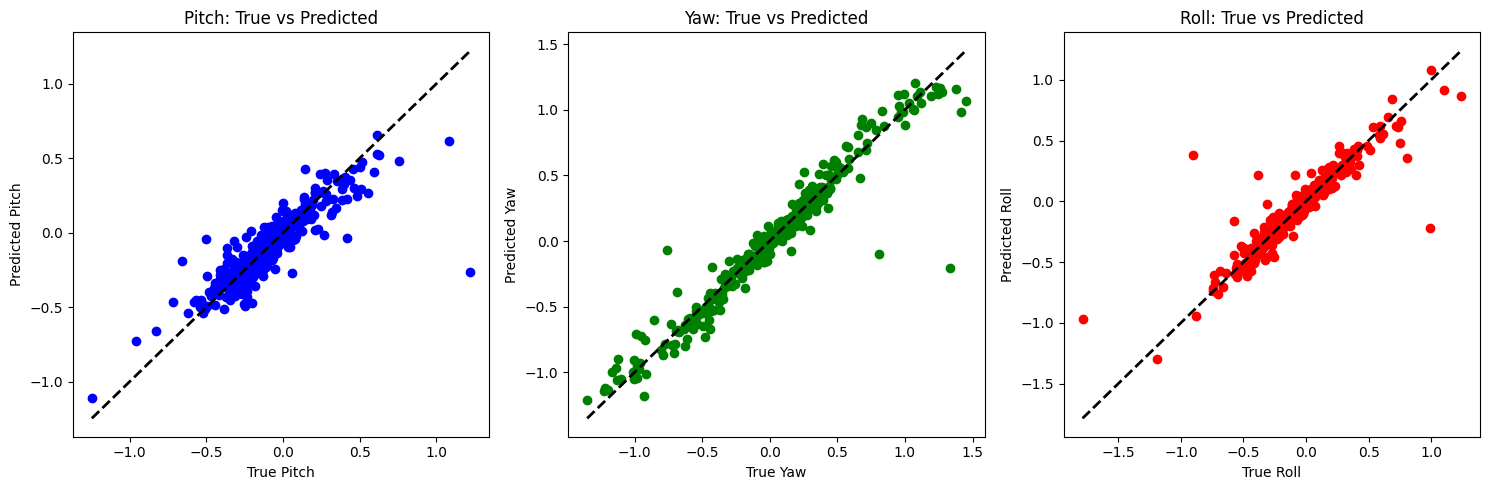

Train Pitch MSE: 0.2923402320645861
Train Yaw MSE: 0.04319581439406601
Train Roll MSE: 0.331542726933425


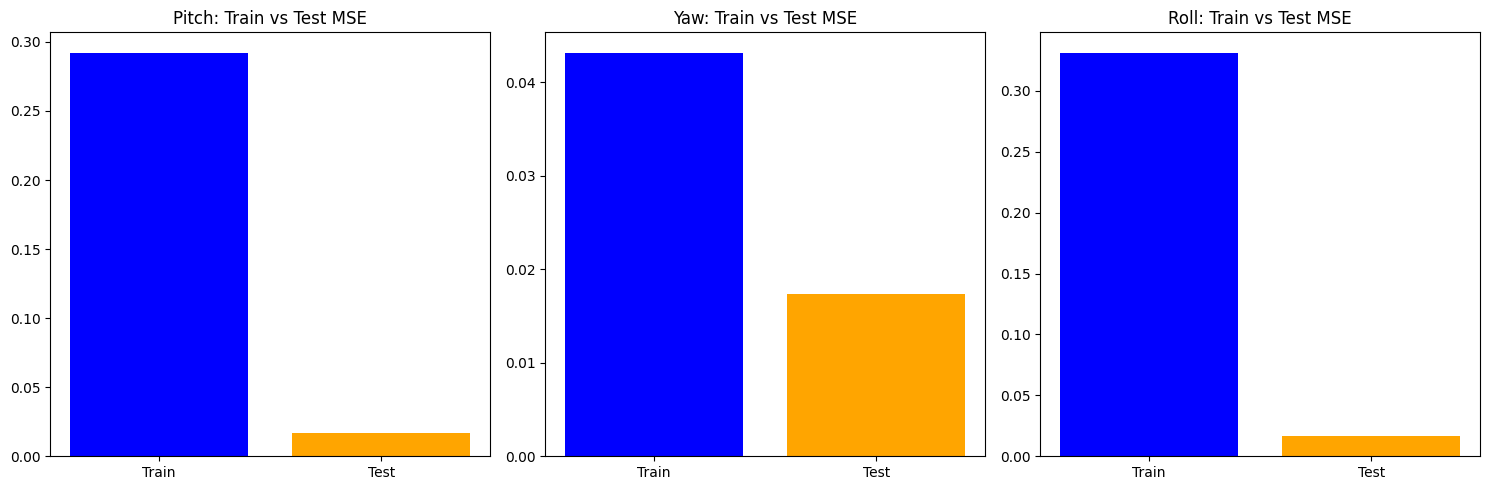

In [8]:
# import os
# import cv2
# import numpy as np
# import mediapipe as mp
# import scipy.io
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt

# # Initialize MediaPipe Face Mesh
# mp_face_mesh = mp.solutions.face_mesh
# face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

# # Function to detect facial landmarks using MediaPipe
# def get_landmarks(image):
#     rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = face_mesh.process(rgb_image)
    
#     if results.multi_face_landmarks:
#         landmarks = []
#         for landmark in results.multi_face_landmarks[0].landmark:
#             x = int(landmark.x * image.shape[1])
#             y = int(landmark.y * image.shape[0])
#             landmarks.append([x, y])
#         return np.array(landmarks).flatten()  # Flatten the landmarks into a 1D array
#     else:
#         return None

# # Function to load data and extract features and labels
# def load_data_and_extract_features(directory):
#     X = []  # Feature vectors (landmarks)
#     y_pitch = []  # Pitch angles
#     y_yaw = []  # Yaw angles
#     y_roll = []  # Roll angles
    
#     for filename in os.listdir(directory):
#         if filename.endswith('.jpg'):
#             image_path = os.path.join(directory, filename)
#             mat_path = os.path.join(directory, filename.replace('.jpg', '.mat'))
            
#             # Check if the corresponding .mat file exists
#             if os.path.exists(mat_path):
#                 image = cv2.imread(image_path)
#                 landmarks = get_landmarks(image)
                
#                 if landmarks is not None:
#                     X.append(landmarks)
                    
#                     # Load the ground truth values from the .mat file
#                     mat_data = scipy.io.loadmat(mat_path)
#                     pose_params = mat_data['Pose_Para'][0][:3]  # Pitch, Yaw, Roll
                    
#                     y_pitch.append(pose_params[0])
#                     y_yaw.append(pose_params[1])
#                     y_roll.append(pose_params[2])
                    
#     return np.array(X), np.array(y_pitch), np.array(y_yaw), np.array(y_roll)

# # Directory containing the images and mat files
# directory = 'D:/NTI/AFLW2000-3D/AFLW2000'

# # Load data and extract features
# X, y_pitch, y_yaw, y_roll = load_data_and_extract_features(directory)

# # Split data into training and testing sets
# X_train, X_test, y_pitch_train, y_pitch_test = train_test_split(X, y_pitch, test_size=0.2, random_state=42)
# _, _, y_yaw_train, y_yaw_test = train_test_split(X, y_yaw, test_size=0.2, random_state=42)
# _, _, y_roll_train, y_roll_test = train_test_split(X, y_roll, test_size=0.2, random_state=42)

# # Initialize SVM regressors for each angle
# svr_pitch = SVR(kernel='rbf')
# svr_yaw = SVR(kernel='rbf')
# svr_roll = SVR(kernel='rbf')

# # Train the regressors
# svr_pitch.fit(X_train, y_pitch_train)
# svr_yaw.fit(X_train, y_yaw_train)
# svr_roll.fit(X_train, y_roll_train)

# # Predict on the test set
# y_pitch_pred = svr_pitch.predict(X_test)
# y_yaw_pred = svr_yaw.predict(X_test)
# y_roll_pred = svr_roll.predict(X_test)

# # Evaluate the model
# mse_pitch = mean_squared_error(y_pitch_test, y_pitch_pred)
# mse_yaw = mean_squared_error(y_yaw_test, y_yaw_pred)
# mse_roll = mean_squared_error(y_roll_test, y_roll_pred)

# print(f'Pitch MSE: {mse_pitch}')
# print(f'Yaw MSE: {mse_yaw}')
# print(f'Roll MSE: {mse_roll}')

# # Plot predicted vs actual values for each angle
# plt.figure(figsize=(15, 5))

# # Pitch
# plt.subplot(1, 3, 1)
# plt.scatter(y_pitch_test, y_pitch_pred, c='blue')
# plt.plot([min(y_pitch_test), max(y_pitch_test)], [min(y_pitch_test), max(y_pitch_test)], 'k--', lw=2)
# plt.xlabel('True Pitch')
# plt.ylabel('Predicted Pitch')
# plt.title('Pitch: True vs Predicted')

# # Yaw
# plt.subplot(1, 3, 2)
# plt.scatter(y_yaw_test, y_yaw_pred, c='green')
# plt.plot([min(y_yaw_test), max(y_yaw_test)], [min(y_yaw_test), max(y_yaw_test)], 'k--', lw=2)
# plt.xlabel('True Yaw')
# plt.ylabel('Predicted Yaw')
# plt.title('Yaw: True vs Predicted')

# # Roll
# plt.subplot(1, 3, 3)
# plt.scatter(y_roll_test, y_roll_pred, c='red')
# plt.plot([min(y_roll_test), max(y_roll_test)], [min(y_roll_test), max(y_roll_test)], 'k--', lw=2)
# plt.xlabel('True Roll')
# plt.ylabel('Predicted Roll')
# plt.title('Roll: True vs Predicted')

# plt.tight_layout()
# plt.show()

# # Visualizing overfitting with train vs test loss
# y_pitch_train_pred = svr_pitch.predict(X_train)
# y_yaw_train_pred = svr_yaw.predict(X_train)
# y_roll_train_pred = svr_roll.predict(X_train)

# mse_pitch_train = mean_squared_error(y_pitch_train, y_pitch_train_pred)
# mse_yaw_train = mean_squared_error(y_yaw_train, y_yaw_train_pred)
# mse_roll_train = mean_squared_error(y_roll_train, y_roll_train_pred)

# print(f'Train Pitch MSE: {mse_pitch_train}')
# print(f'Train Yaw MSE: {mse_yaw_train}')
# print(f'Train Roll MSE: {mse_roll_train}')

# # Plot train vs test loss for each angle
# plt.figure(figsize=(15, 5))

# # Pitch
# plt.subplot(1, 3, 1)
# plt.bar(['Train', 'Test'], [mse_pitch_train, mse_pitch], color=['blue', 'orange'])
# plt.title('Pitch: Train vs Test MSE')

# # Yaw
# plt.subplot(1, 3, 2)
# plt.bar(['Train', 'Test'], [mse_yaw_train, mse_yaw], color=['blue', 'orange'])
# plt.title('Yaw: Train vs Test MSE')

# # Roll
# plt.subplot(1, 3, 3)
# plt.bar(['Train', 'Test'], [mse_roll_train, mse_roll], color=['blue', 'orange'])
# plt.title('Roll: Train vs Test MSE')

# plt.tight_layout()
# plt.show()